In [82]:
import os
# os.chdir('./04_ExerciseCodeAndInstructions/imageio')
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import itertools
import tensorflow as tf
import tensorflow.keras
import MyImageClass as myimg
import copy

PATH_TO_DATA = '../../06_DataFiles/oop_data/'

## 1. Numpy
Numpy is an extreemly commonly used python package. Its used to work with arrays.

In [83]:
arrA = np.array([[1,3],[5,7]])
arrB = np.array([[10,9],[8,7]])

In [84]:
arrA+arrB

array([[11, 12],
       [13, 14]])

In [85]:
arrA*arrB

array([[10, 27],
       [40, 49]])

In [86]:
arrA @ arrB

array([[ 34,  30],
       [106,  94]])

In [87]:
arrB @ arrA

array([[55, 93],
       [43, 73]])

## 2. Example from lecture
### 2.1 Color excel image
Let's Take a look at an image, and how images are saved as numbers
Code here, but show in excel!

In [88]:
import PIL
from PIL import Image
import skimage 
import skimage.transform

In [89]:
def fGetColor(val, strColor):
    """
    Given a value and a color, return the hex code for the color
    e.g. val=255, strColor='r' will return #ff0000
    This is designed for a single colors only
    """
    dctRGB = {'r':0,'g':0,'b':0}
    dctRGB[strColor] = int(val)
    return fRGBToHex(**dctRGB)
    
def fRGBToHex(r,g,b):
    """
    inputs r,g,b values 0-255 and outputs the hex color string
    """
    return '#%02x%02x%02x' % (r,g,b)

def fColorRows(row):
    """
    given a row from the pandas dataframe, uses the index to determine the color channel
    return a list of styling for that row.
    """
    strColorChannel = row.name[0][1]
    lColors = [fGetColor(x, strColorChannel) for x in row]    
    return ['background-color: {}'.format(color) for color in lColors]

In [90]:
#load the image
img = np.array(Image.open(PATH_TO_DATA + 'SNs.jpg')).astype(int)
#down sample (just to make the data size more manageable)
img = np.round(skimage.transform.rescale(img/255, 0.5, channel_axis=2)*255)
#split the channels for manipulation and coloration
imgR = img[:,:,0]
imgG = img[:,:,1]
imgB = img[:,:,2]
#create pandas dataframes for each channel
dfR = pd.DataFrame(imgR).astype(int)
dfG = pd.DataFrame(imgG).astype(int)
dfB = pd.DataFrame(imgB).astype(int)

#Modify the index to hold the color channel name
dfR.index = pd.MultiIndex.from_product([['1r'],dfR.index])
dfG.index = pd.MultiIndex.from_product([['2g'],dfG.index])
dfB.index = pd.MultiIndex.from_product([['3b'],dfB.index])
#combine the channles into one dataframe
dfConcat = pd.concat([dfR,dfG,dfB])
dfConcat = dfConcat.applymap(lambda x: str(x).zfill(3))
#dfConcat.applymap(highlight_cells)

/tmp/ipykernel_62205/1893857376.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfConcat = dfConcat.applymap(lambda x: str(x).zfill(3))


In [91]:
#output the image (without coloring the cells)
dfConcat.sort_index(level=1).to_excel('../OOP/oop_outputs/SNc_numbers.xlsx', index=False, header=False)
#output the image (color the cells)
dfConcat.sort_index(level=1).style.apply(fColorRows, axis=1).to_excel('../OOP/oop_outputs/SNc_colored.xlsx', index=False, header=False)

### 2.2 Difference image

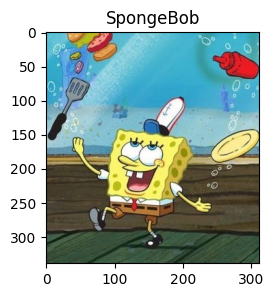

In [92]:
#simple example of how to use matplotlib
img1 = np.array(Image.open(PATH_TO_DATA + 'SpongBobComp1.jpeg')).astype(int)
fig, ax = plt.subplots(1,1, figsize=(3,3))
_ = ax.set_title('SpongeBob')
_ = ax.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..56169].


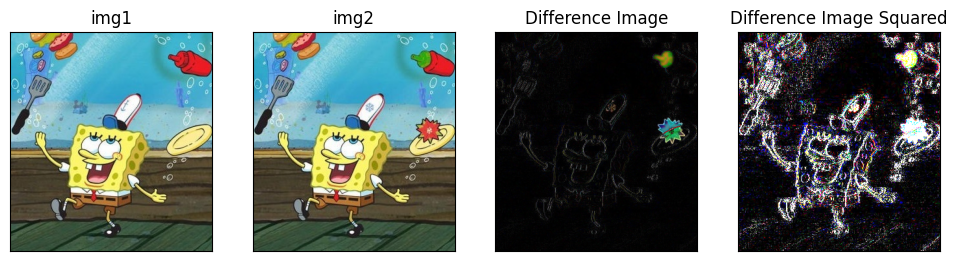

In [93]:
# load the 2 images
img1 = np.array(Image.open(PATH_TO_DATA + 'SpongBobComp1.jpeg')).astype(int)
img2 = np.array(Image.open(PATH_TO_DATA + 'SpongBobComp2.jpeg')).astype(int)

#create a plot 
fig, axs = plt.subplots(1,4, figsize=(12,3))

#plot img1
axs[0].set_title('img1')
axs[0].imshow(img1)
#plot img2
axs[1].set_title('img2')
axs[1].imshow(img2)

#calc img subtraction and plot
imgDif = abs(img1-img2)
axs[2].set_title('Difference Image')
axs[2].imshow(imgDif)

#calc square of dif and plot
imgDif2 = (img1-img2)**2
axs[3].set_title('Difference Image Squared')
axs[3].imshow(imgDif2)

for ax in axs:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

## 3. Image analysis on MNIST

In [94]:
#Run this cell if you update the MyImageClass.py file
#This allows you to reload the MyImageClass script so you don't have to restart the kernel 
# if you change the code. But don't forget to remake the objects with the updated class!

import importlib
importlib.reload(myimg)

<module 'MyImageClass' from '/project/nanocourse/SWE_OOP/train09/Module_2_Materials/04_ExerciseCodeAndInstructions/imageio/MyImageClass.py'>

### 3.1 Load the MNIST dataset

In [95]:
_, (arrImg, arrTarget) = tensorflow.keras.datasets.mnist.load_data()
arrImg = arrImg/255
intNTargets = arrTarget.max()

### 3.2 create ImgArray objects from the MNIST dataset (one per image)

In [96]:
#create lists of the image target from the data
lImg = [myimg.MyImgClass(arrImg, intTarget) for arrImg, intTarget in zip(arrImg, arrTarget)]
#create a dict that contains a list of each image class
dctImgTarget = {} #update to label
for i in range(intNTargets+1):
    dctImgTarget[i] = [x for x in lImg if x.intLabel == i]

### 3.3 visualize an example of each digit

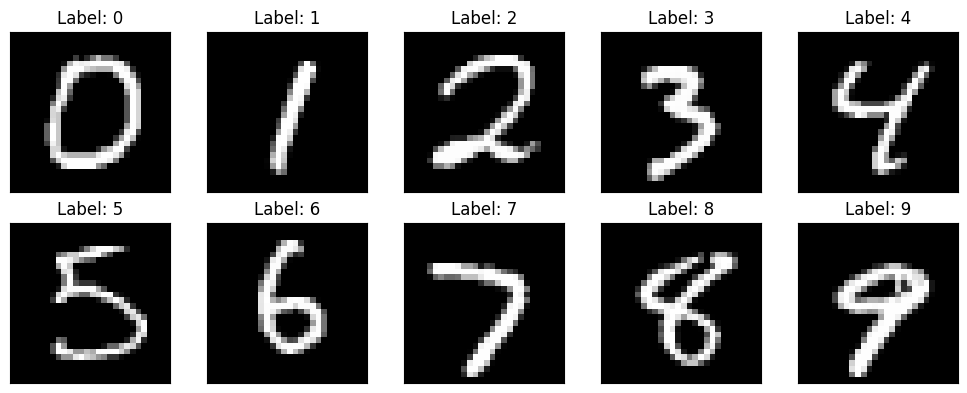

In [97]:
# plot the first of each digits
fig, axs = plt.subplots(2,5, figsize=(10,4))
axs = axs.flatten()
for i in range(intNTargets+1):
    dctImgTarget[i][1].fPlot(axs[i], imshow_kwargs={'cmap':'gray'})
plt.tight_layout()

### 3.4 Create mean and std iamges across all images

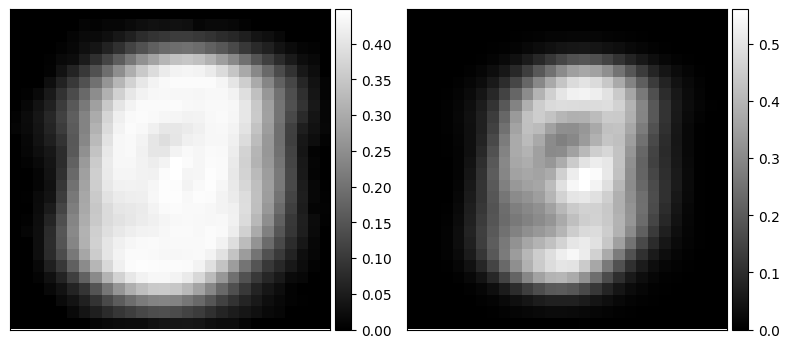

In [98]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
imgAve = myimg.MyImgClass.fComputeMeanAcrossImages(lImg)
imgStd = myimg.MyImgClass.fComputeStdAcrossImages(lImg)

imgAve.fPlot(axs[0], imshow_kwargs={'cmap':'gray'}, add_colorbar=True)
imgStd.fPlot(axs[1], imshow_kwargs={'cmap':'gray'}, add_colorbar=True)
plt.tight_layout()

### 3.5 Create mean and std images for each class

In [99]:
#create the average image for each class
dctAvgImg = {}
dctStdImg = {}
for i in range(intNTargets+1):
    dctAvgImg[i] = myimg.MyImgClass.fComputeMeanAcrossImages(dctImgTarget[i])
    dctStdImg[i] = myimg.MyImgClass.fComputeStdAcrossImages(dctImgTarget[i])

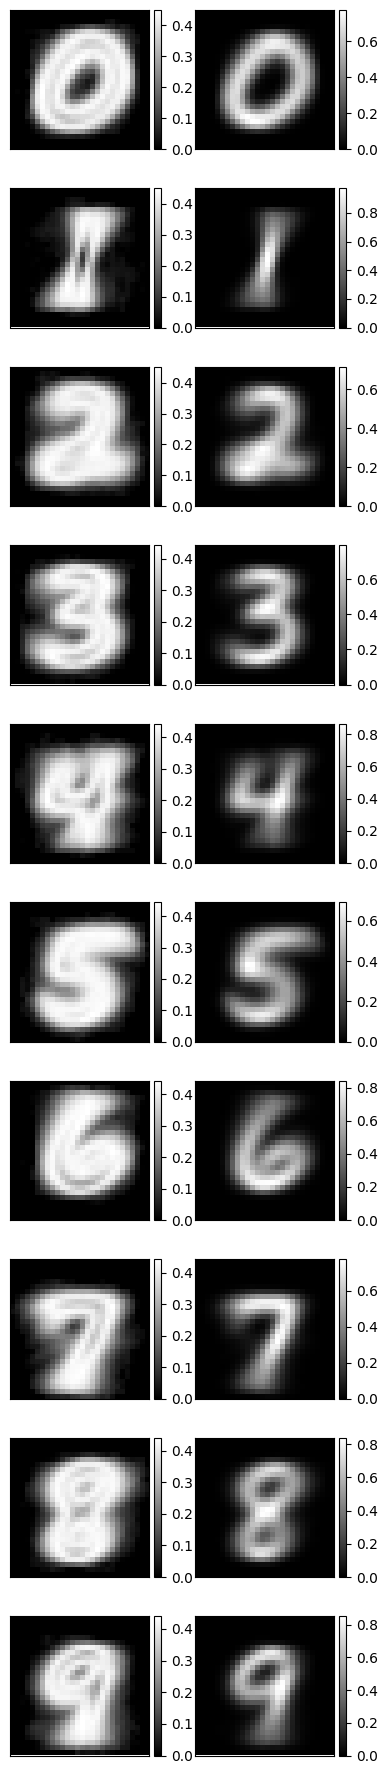

In [100]:
#plot the average for each image
fig, axs = plt.subplots(intNTargets+1,2, figsize=(4,2*intNTargets))
for intTarget in dctAvgImg.keys():
    dctAvgImg[intTarget].fPlot(axs[intTarget,0], 
                               imshow_kwargs={'cmap':'gray'},
                               add_colorbar=True)
    dctStdImg[intTarget].fPlot(axs[intTarget,1], 
                               imshow_kwargs={'cmap':'gray'},
                               add_colorbar=True)
fig.tight_layout()

### 3.6 Difference images and Mean squared error (MSE)
### 3.6.1 difference images and MSE between numbers

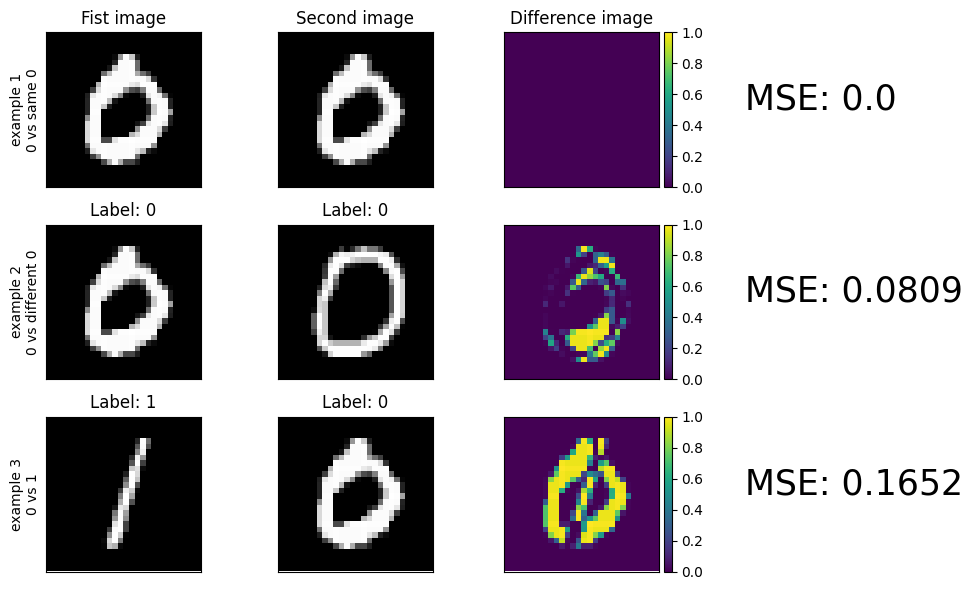

In [101]:
fig, axs = plt.subplots(3,4, figsize=(10,6))

### Clac and plot 0 vs same 0 ###
#what is the type of imgDifSame?!
imgDifSame0v0 = dctImgTarget[0][0].fPixelwiseSqDif(dctImgTarget[0][0])
dMSESame0v0 = dctImgTarget[0][0].fMSE(dctImgTarget[0][0])
#plot
dctImgTarget[0][0].fPlot(axs[0,0], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
dctImgTarget[0][0].fPlot(axs[0,1], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
imgDifSame0v0.fPlot(axs[0,2], 
                    imshow_kwargs={'cmap':'viridis','vmin':0,'vmax':1},
                    add_colorbar=True)
axs[0,3].axis('off')
axs[0,3].text(x=.1,y=.5,s=f'MSE: {round(dMSESame0v0,4)}', fontsize=25)


### Clac and plot 0 vs different 0 ###
imgDif0v0 = dctImgTarget[0][0].fPixelwiseSqDif(dctImgTarget[0][2])
dMSE0v0 = dctImgTarget[0][0].fMSE(dctImgTarget[0][2])
#plot
dctImgTarget[0][0].fPlot(axs[1,0], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
dctImgTarget[0][1].fPlot(axs[1,1], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
imgDif0v0.fPlot(axs[1,2], 
                imshow_kwargs={'cmap':'viridis','vmin':0,'vmax':1},
                add_colorbar=True)
axs[1,3].axis('off')
axs[1,3].text(x=.1,y=.5,s=f'MSE: {round(dMSE0v0,4)}', fontsize=25)

### Clac and plot 0 vs different 0 ###
imgDif1v0 = dctImgTarget[1][0].fPixelwiseSqDif(dctImgTarget[0][0])
dMSE1v0 = dctImgTarget[1][0].fMSE(dctImgTarget[0][0])
#plot
dctImgTarget[1][0].fPlot(axs[2,0], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
dctImgTarget[0][0].fPlot(axs[2,1], imshow_kwargs={'cmap':'gray','vmin':0,'vmax':1})
imgDif1v0.fPlot(axs[2,2], 
                imshow_kwargs={'cmap':'viridis','vmin':0,'vmax':1},
                add_colorbar=True)
axs[2,3].axis('off')
axs[2,3].text(x=.1,y=.5,s=f'MSE: {round(dMSE1v0,4)}', fontsize=25)

axs[0,0].set_title('Fist image')
axs[0,1].set_title('Second image')
axs[0,2].set_title('Difference image')

axs[0,0].set_ylabel('example 1\n0 vs same 0')
axs[1,0].set_ylabel('example 2\n0 vs different 0')
axs[2,0].set_ylabel('example 3\n0 vs 1')

plt.tight_layout()

###  3.6.2 calcualte the difference between the mean images

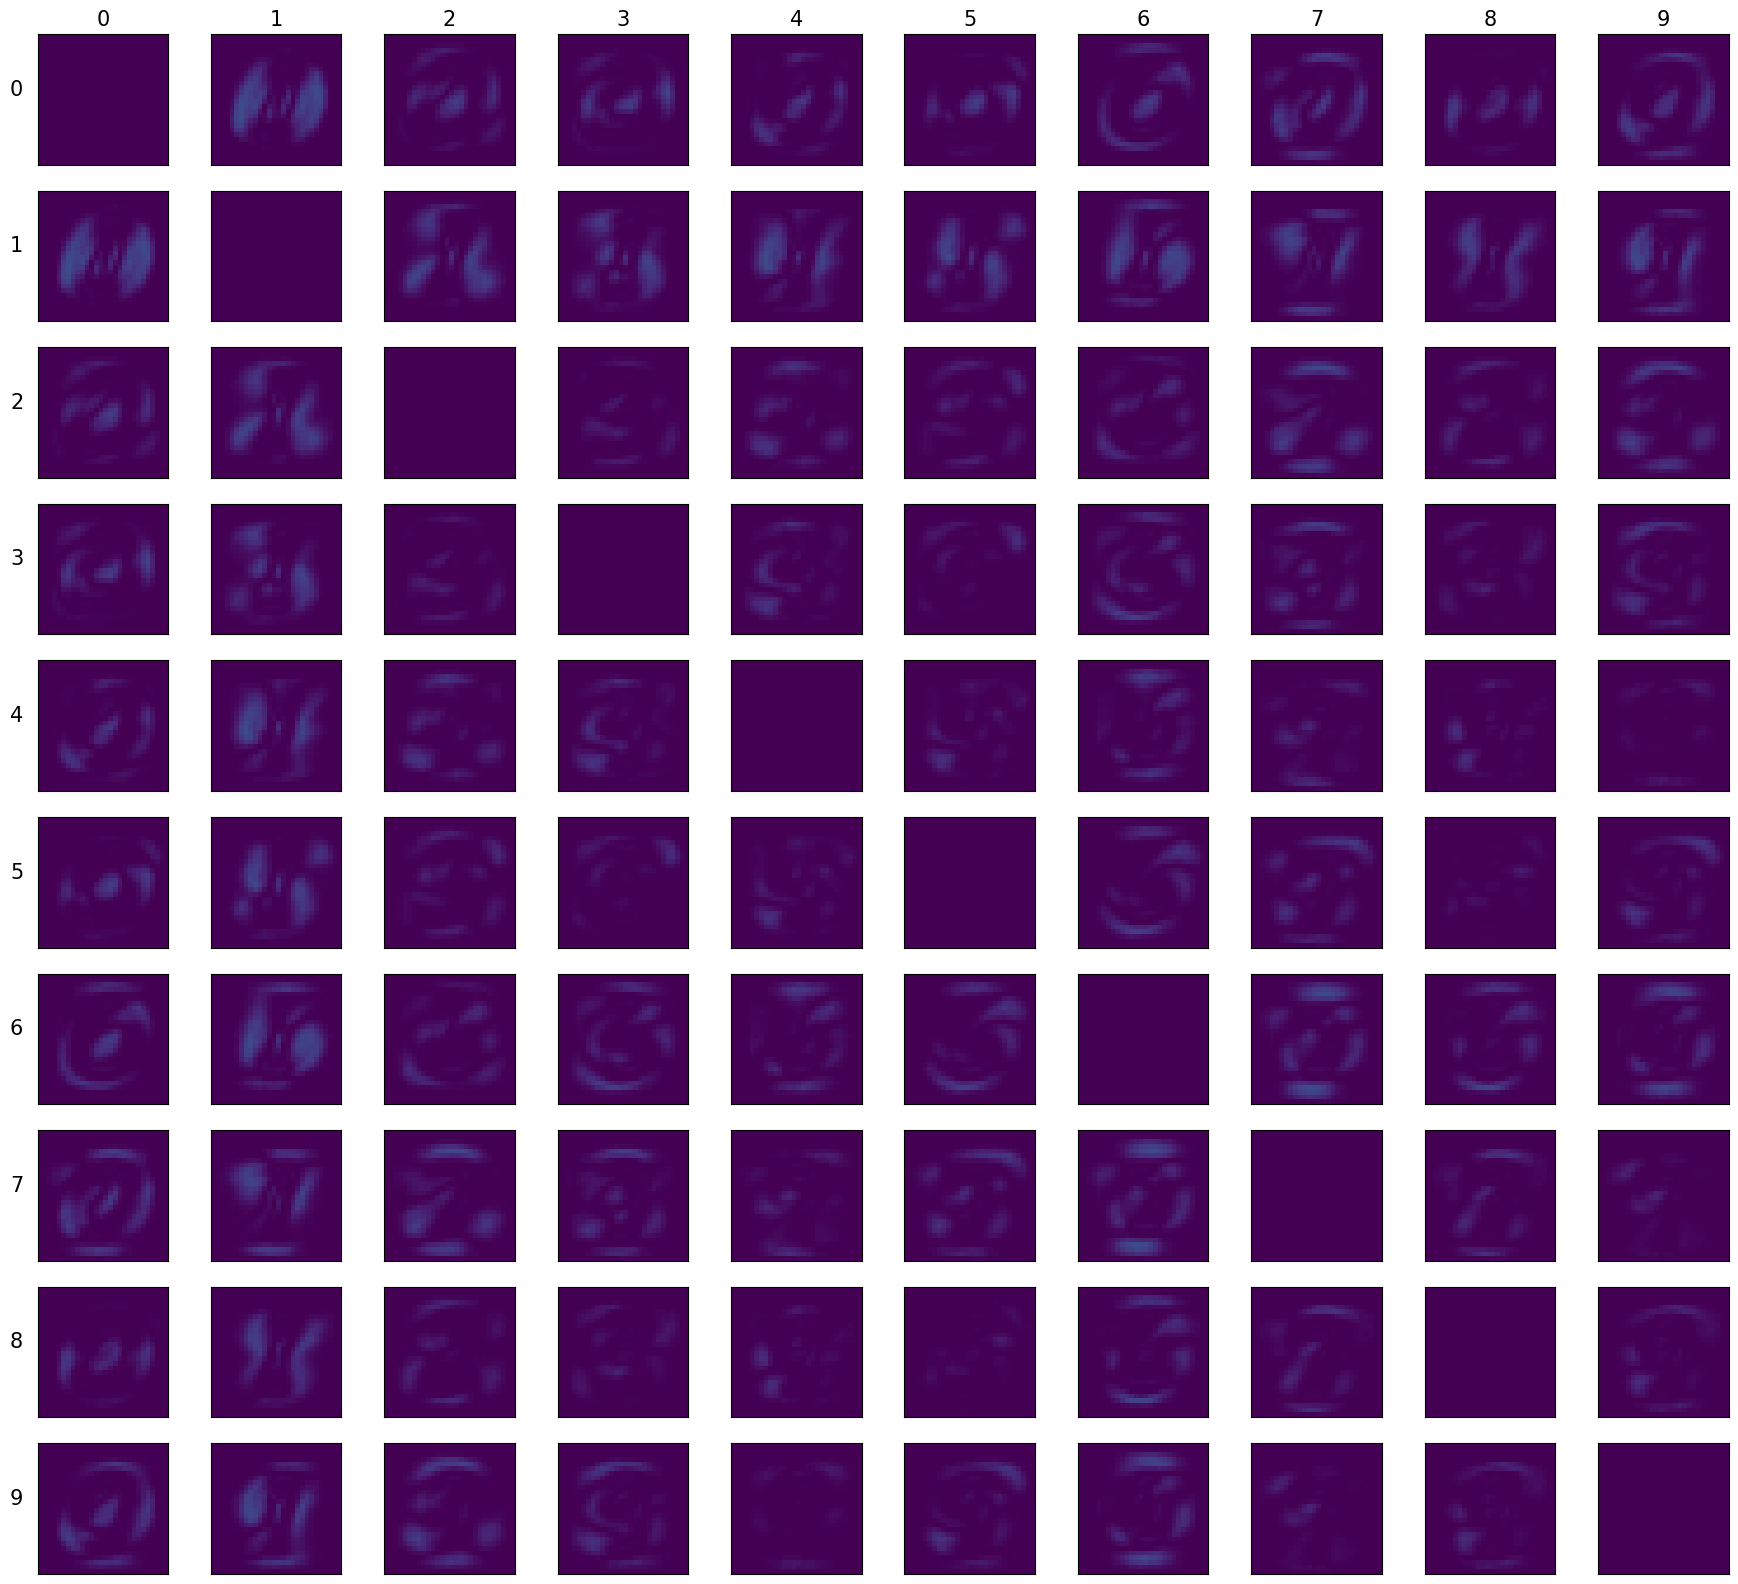

In [102]:
fig, axs = plt.subplots(10,10, figsize=(22,20))
for i in range(10):
    axs[0,i].set_title(i, fontsize=15)
    axs[i,0].set_ylabel(i, rotation=0, fontsize=15, labelpad=15)
    for j in range(10):
        imgDif = dctAvgImg[i].fPixelwiseSqDif(dctAvgImg[j])
        #print(imgDif.arrImg.max())
        imgDif.fPlot(axs[i,j], 
                     imshow_kwargs={'cmap':'viridis', 'vmin':0, 'vmax':.85},
                     show_ticks=False)

### 3.6.3 claculate the MSE between the mean images. 
Note: This is a summary of the above plot where each plot is a sinlge value (mean)!
Rather than plot an image, here we create a heatmap to visually display the differences between the mean digit images per class

In [103]:
#create a numpy array with the MSE between the mean numbers
arrMSE = np.empty(shape=(10,10))
for i in range(10):
    for j in range(10):
        arrMSE[i,j] = dctAvgImg[i].fMSE(dctAvgImg[j])

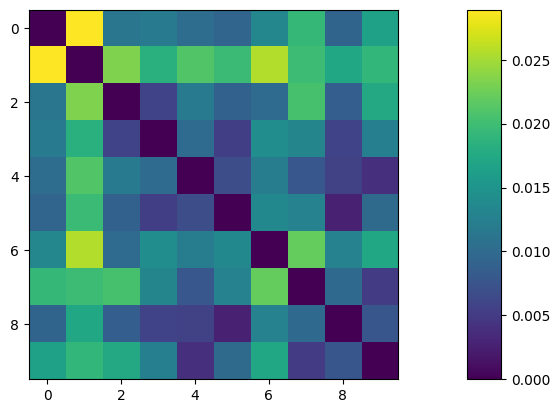

In [104]:
#plot as heatmap. 
fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios':[12,1]})
hm = axs[0].imshow(arrMSE)
fig.colorbar(hm, axs[1])

# 4. Can you use the class to compare MRI images?!
One common phenotype of Alzheimer's disease is atrophy of the brain. 

### 4.1 Load the data

In [105]:
#use 32x32 small examples
dctT1 = np.load(PATH_TO_DATA + 'T1_slice.npz')
arrImgLarge = dctT1['images'][:,:,:,0]
#we're working with 32 by 32 for this course so let's downsample
arrImg = np.stack([skimage.transform.rescale(arr, 1/6, anti_aliasing=False) for arr in arrImgLarge])
arrTarget = dctT1['label']

### 4.2 organlize the data

In [106]:
lT1Img = [myimg.MyImgClass(arrImg,intLabel) for arrImg,intLabel in zip(arrImg, arrTarget)]
lT1ImgLarge = [myimg.MyImgClass(arrImg,intLabel) for arrImg,intLabel in zip(arrImgLarge, arrTarget)]
lT1ImgCN = [img for img in lT1Img if img.intLabel == 0]
lT1ImgAD = [img for img in lT1Img if img.intLabel == 1]

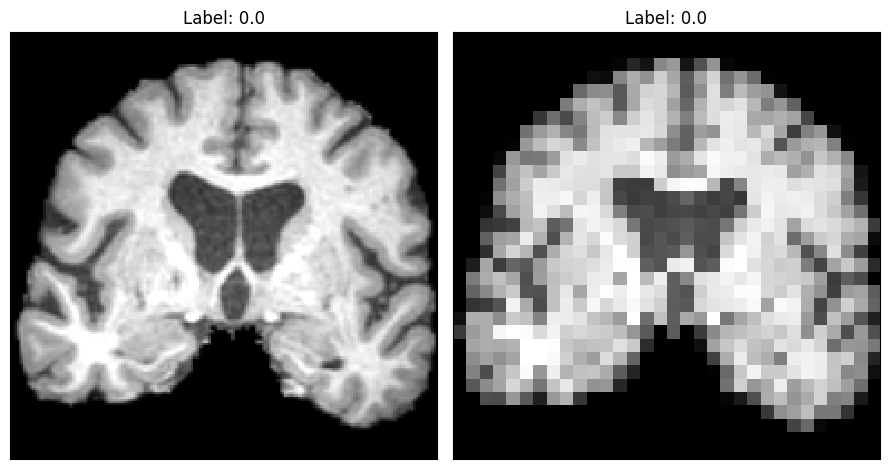

In [107]:
fig, axs = plt.subplots(1,2, figsize=(9,8))
lT1ImgLarge[35].fPlot(ax=axs[0], imshow_kwargs={'cmap':'gray'})
lT1Img[35].fPlot(ax=axs[1], imshow_kwargs={'cmap':'gray'})
plt.tight_layout()

### 4.3 Plot example images of the data

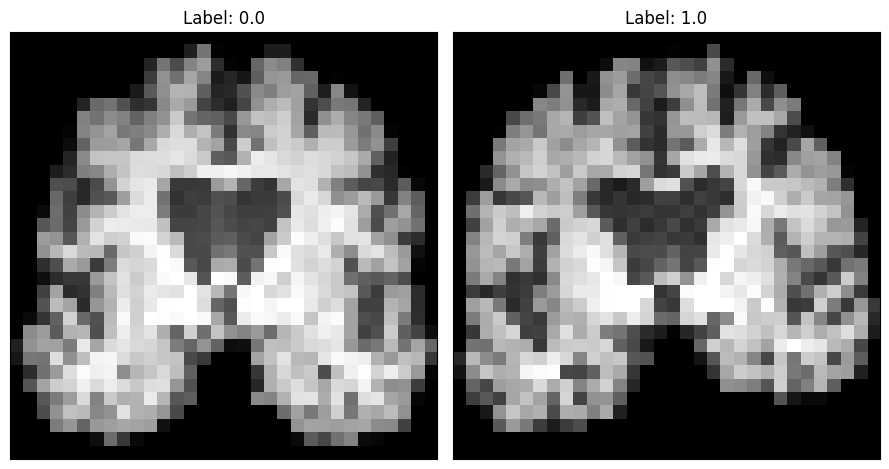

In [108]:
fig, axs = plt.subplots(1,2, figsize=(9,8))
lT1ImgCN[3].fPlot(ax=axs[0], imshow_kwargs={'cmap':'gray'})
lT1ImgAD[40].fPlot(ax=axs[1], imshow_kwargs={'cmap':'gray'})
plt.tight_layout()

## 4.4 Calculate and plot the mean and std images

In [109]:
imgCNAve = myimg.MyImgClass.fComputeMeanAcrossImages(lT1ImgCN)
imgCNStd = myimg.MyImgClass.fComputeStdAcrossImages(lT1ImgCN)
imgADAve = myimg.MyImgClass.fComputeMeanAcrossImages(lT1ImgAD)
imgADStd = myimg.MyImgClass.fComputeStdAcrossImages(lT1ImgAD)

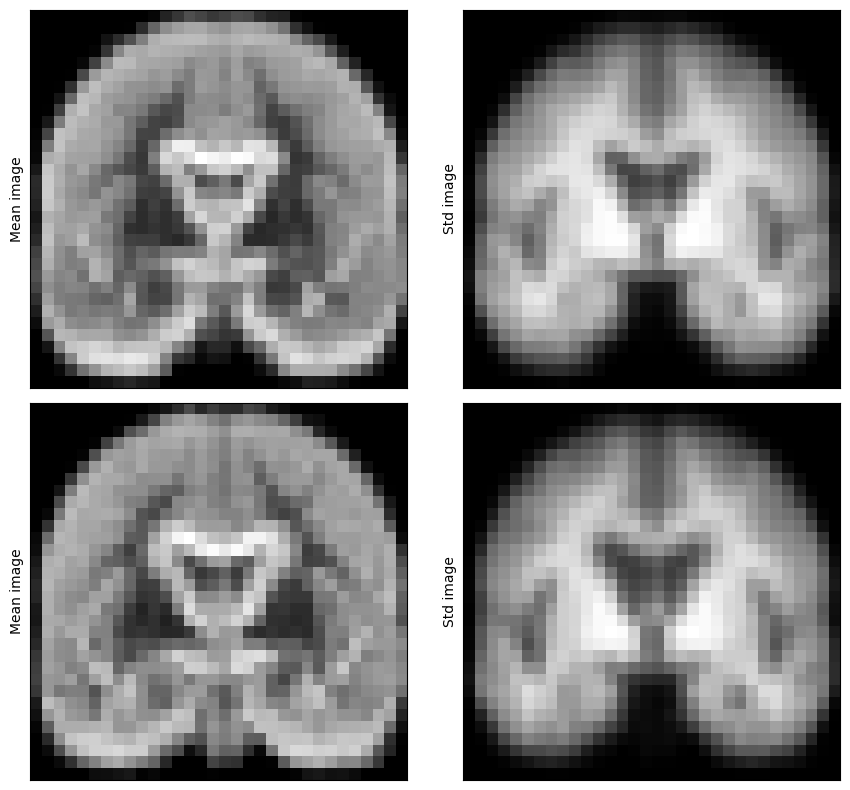

In [110]:
fig, axs = plt.subplots(2,2, figsize=(9,8))
imgCNAve.fPlot(axs[0,0], imshow_kwargs={'cmap':'gray'})
imgCNStd.fPlot(axs[0,1], imshow_kwargs={'cmap':'gray'})
imgADAve.fPlot(axs[1,0], imshow_kwargs={'cmap':'gray'})
imgADStd.fPlot(axs[1,1], imshow_kwargs={'cmap':'gray'})
axs[0][0].set_ylabel('Mean image')
axs[1][0].set_ylabel('Mean image')
axs[0][1].set_ylabel('Std image')
axs[1][1].set_ylabel('Std image')
plt.tight_layout()

## 4.5 Calcualte and plot the difference image from the two averages

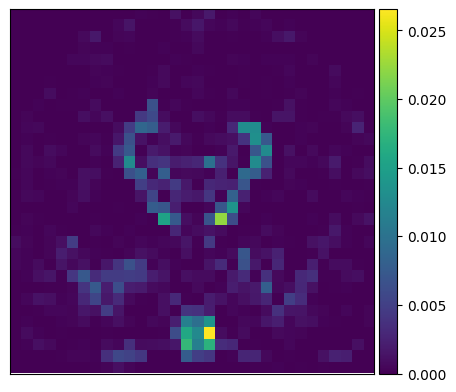

In [111]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
arrImgDifOfAve = imgCNAve.fPixelwiseSqDif(imgADAve)
arrImgDifOfAve.fPlot(ax, add_colorbar=True)

## 4.6 Calcaulate and plot pairwise differences an plot

In [112]:
import MyImageClass
import importlib
importlib.reload(MyImageClass)

<module 'MyImageClass' from '/project/nanocourse/SWE_OOP/train09/Module_2_Materials/04_ExerciseCodeAndInstructions/imageio/MyImageClass.py'>

In [113]:
#this is pair wise difference, so take ~10 secs
lMSDCvC = myimg.MyImgClass.fMSEforEachPairCombination(lT1ImgCN, lT1ImgCN)
lMSDCvA = myimg.MyImgClass.fMSEforEachPairCombination(lT1ImgCN, lT1ImgAD)
lMSDAvA = myimg.MyImgClass.fMSEforEachPairCombination(lT1ImgAD, lT1ImgAD)

In [114]:
dfMeanPixelwiseSqDif = pd.DataFrame([lMSDCvC, lMSDCvA, lMSDAvA],
                    index = ['CN vs CN','CN vs AD', 'AD vs AD']).T

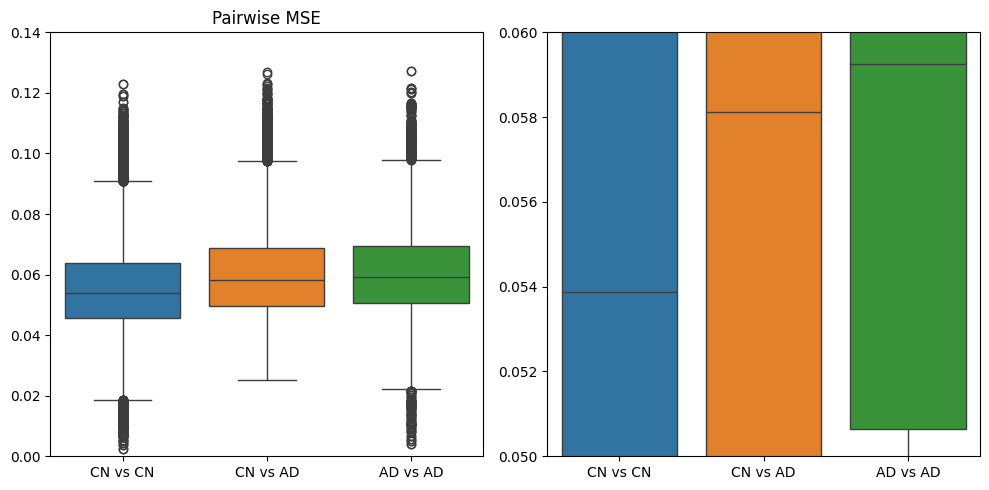

In [115]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
_ = sns.boxplot(data=dfMeanPixelwiseSqDif, ax=axs[0])
_ = sns.boxplot(data=dfMeanPixelwiseSqDif, ax=axs[1])
#_ = sns.swarmplot(data=dfMeanPixelwiseSqDif, ax=axs[0], color='k')#this takes too long to plot
axs[0].set_title('Pairwise MSE')
axs[0].set_ylim(0,.14)
axs[1].set_ylim(.05,.06)
plt.tight_layout()

In [116]:
imgADAve.arrImg.shape

(32, 32)

## 5. Use MSE to compare between reconstructed images 
* (teaser on auto encoders)
    * An autoencoder attempts to recreate the input.
* Check our MSE to keras

### 5.1 Plot the original and the recon images at different epochs

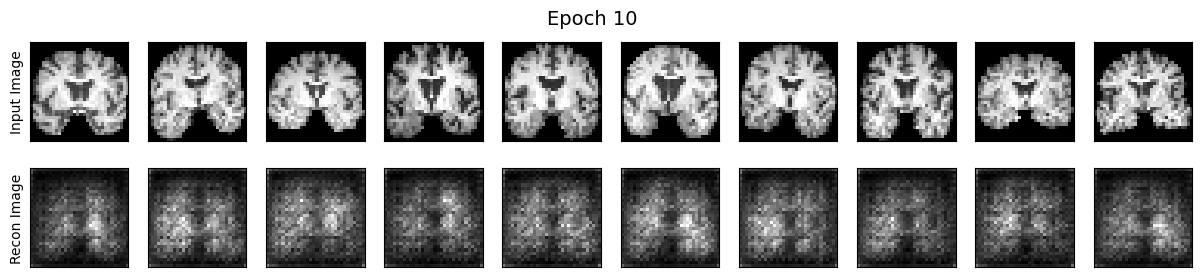

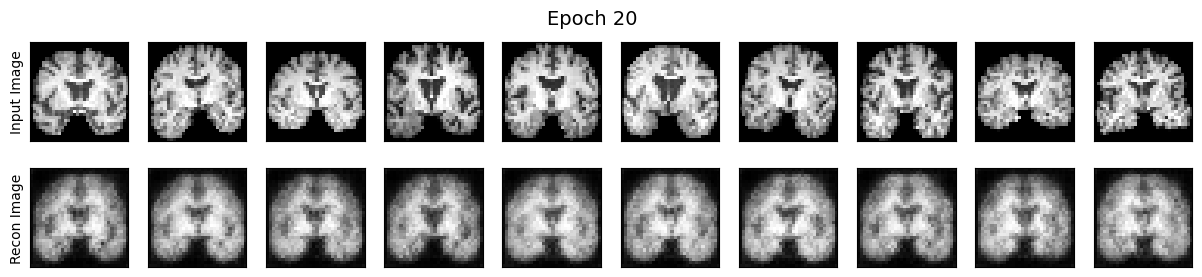

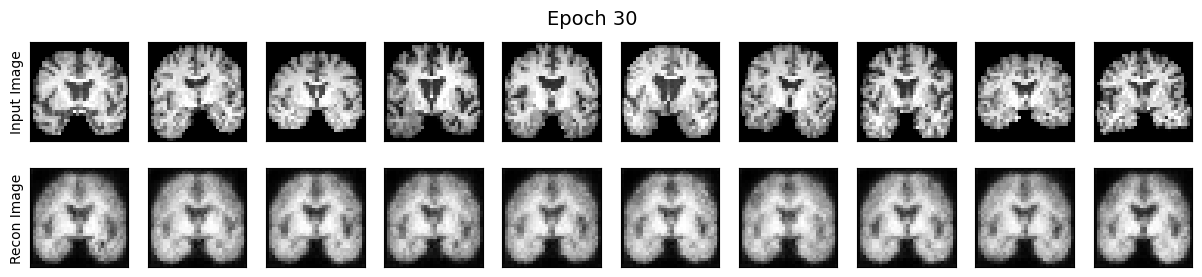

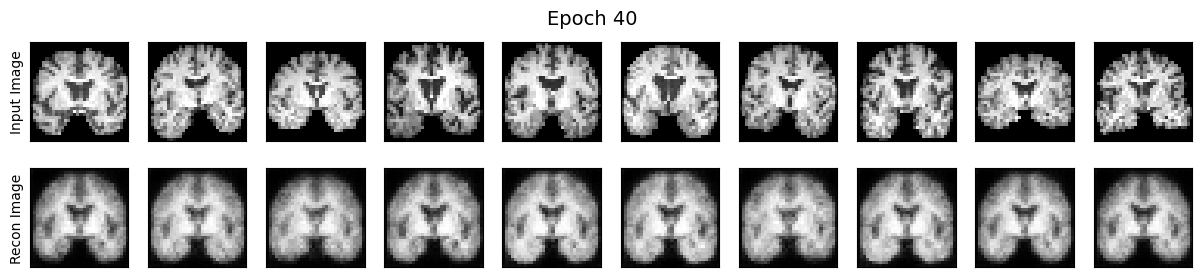

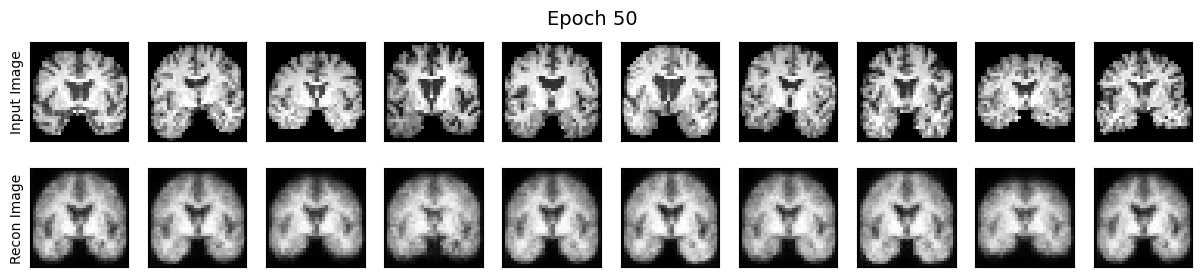

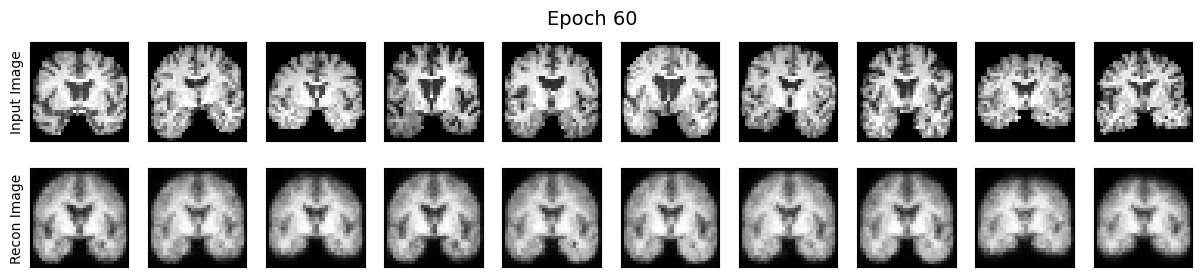

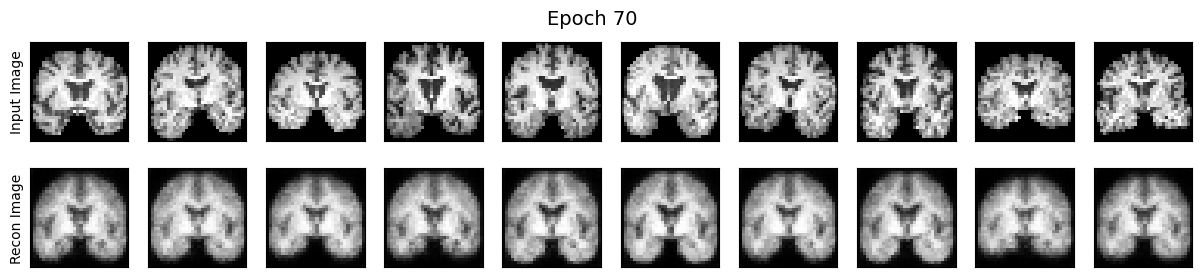

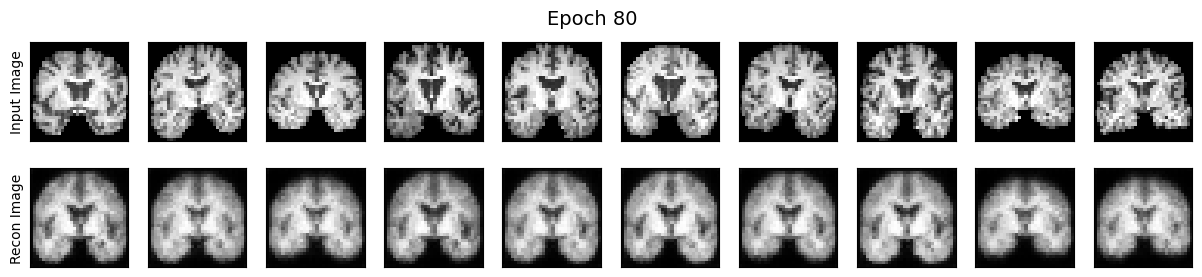

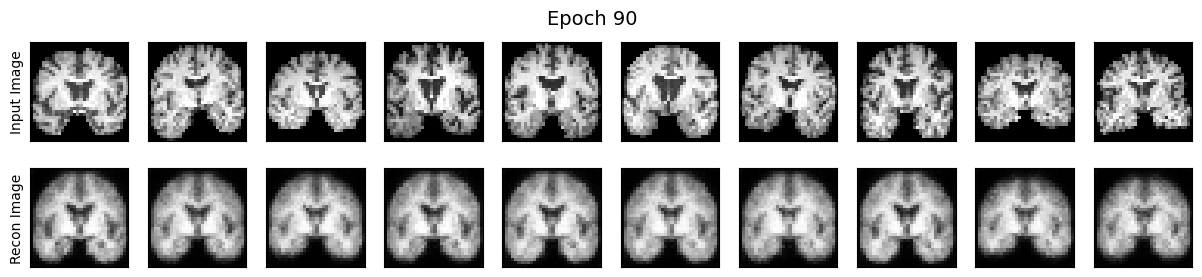

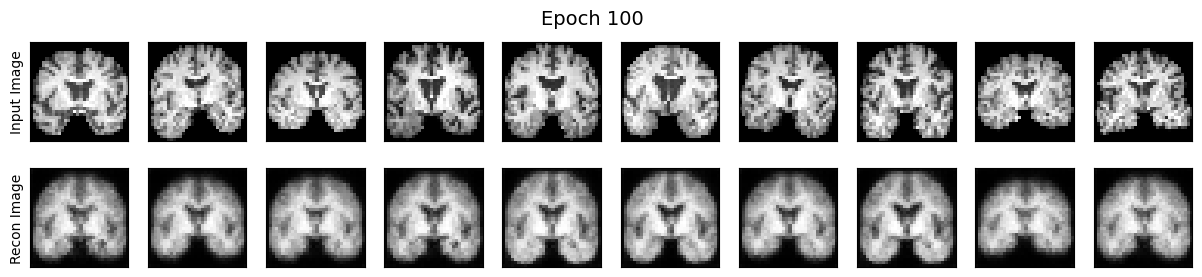

In [117]:
dfLoss = pd.Series(index = range(1,101))

for intEpoch in range(1,101):
    
    arrReal = np.load(PATH_TO_DATA + f'ad_cvaecgan_simloss/epoch{str(intEpoch).zfill(3)}_real.npy')[:,:,:,0]
    arrRecon = np.load(PATH_TO_DATA + f'ad_cvaecgan_simloss/epoch{str(intEpoch).zfill(3)}_recons.npy')[:,:,:,0]
    lImgReal = [myimg.MyImgClass(x) for x in arrReal]
    lImgRecon = [myimg.MyImgClass(x) for x in arrRecon]
    
    #loss
    lLoss = []
    for imgReal, imgRecon in zip(lImgReal, lImgRecon):
        lLoss.append(imgReal.fMSE(imgRecon))
    #keras takes the mean MSE across images to provide a single loss value, we'll do the same for comparison
    dCalcLoss = np.mean(lLoss)
    dfLoss.loc[intEpoch] = dCalcLoss
    
    if intEpoch%10 == 0:
        fig, axs = plt.subplots(2,10, figsize=(15,3))
        for i in range(lImgReal.__len__()):
            lImgReal[i].fPlot(axs[0,i], imshow_kwargs={'cmap':'gray'})
            lImgRecon[i].fPlot(axs[1,i], imshow_kwargs={'cmap':'gray'})
        _ = axs[0,0].set_ylabel('Input Image')
        _ = axs[1,0].set_ylabel('Recon Image')
        plt.suptitle(f"Epoch {intEpoch}", fontsize=14)

        plt.show()

### 5.2 plot the loss per epoch

Text(0.5, 0, 'Epoch')

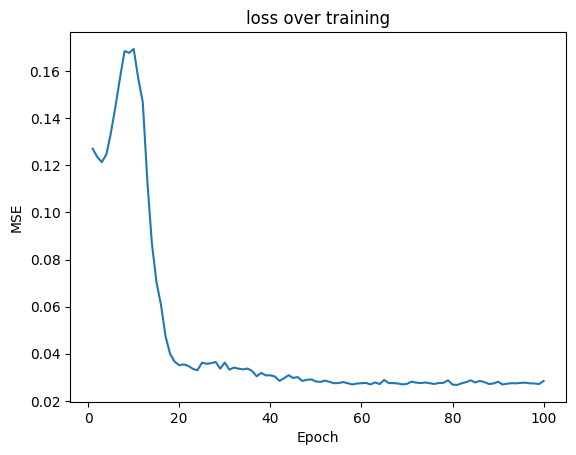

In [118]:
fig,ax = plt.subplots(1,1)
sns.lineplot(data=dfLoss, ax=ax)
ax.set_title('loss over training')
ax.set_ylabel('MSE')
ax.set_xlabel('Epoch')

### 5.3 Calculate the MSE for the last epoch and compare to the tf.keras function.

In [119]:
#calcualte the mean MSE
dCalcLoss = myimg.MyImgClass.fMeanMSE(lImgReal, lImgRecon)
print(f'MSE: {str(dCalcLoss)[:8]}')

MSE: 0.028410


In [120]:
#calc the MSE using TF/keras
dKerasLoss = tf.keras.losses.MeanSquaredError()(arrReal, arrRecon).numpy()
print(f'keras MSE: {str(dKerasLoss)[:8]}')

2025-05-25 01:12:00.436913: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


keras MSE: 0.028410


In [121]:
#make sure the difference is very small (e.g <1e-6)
dCalcLoss-dKerasLoss

np.float32(0.0)